In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Machine learning project\artifacts\raw.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.rename(columns={'race/ethnicity': 'race_ethnicity'}, inplace=True)
df.rename(columns={'parental level of education': 'parental_level_of_education'}, inplace=True)
df.rename(columns={'test preparation course': 'test_preparation_course'}, inplace=True)
df.rename(columns={'math score': 'math_score'}, inplace=True)
df.rename(columns={'reading score': 'reading_score'}, inplace=True)
df.rename(columns={'writing score': 'writing_score'}, inplace=True)





In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("Categorical in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categorical in 'race_ethnicity' variable: ",end=" " )
print(df['race_ethnicity'].unique())

print("Categorical in 'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categorical in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categorical in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categorical in 'gender' variable:  ['female' 'male']
Categorical in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in 'lunch' variable:  ['standard' 'free/reduced']
Categorical in 'test preparation course' variable:  ['none' 'completed']


In [12]:
# Select numerical and categorical columns correctly
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print the results
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total_score'] = df['math_score'] + df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()


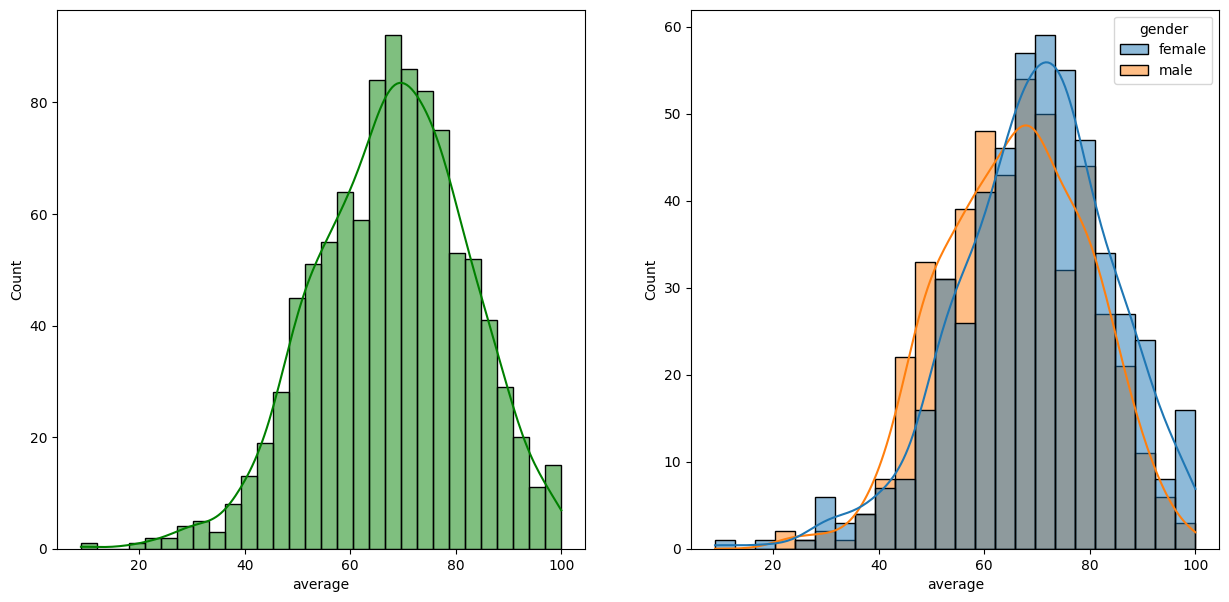

In [17]:
fig, axs = plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot (data=df, x='average', kde=True, hue='gender')
plt.show()

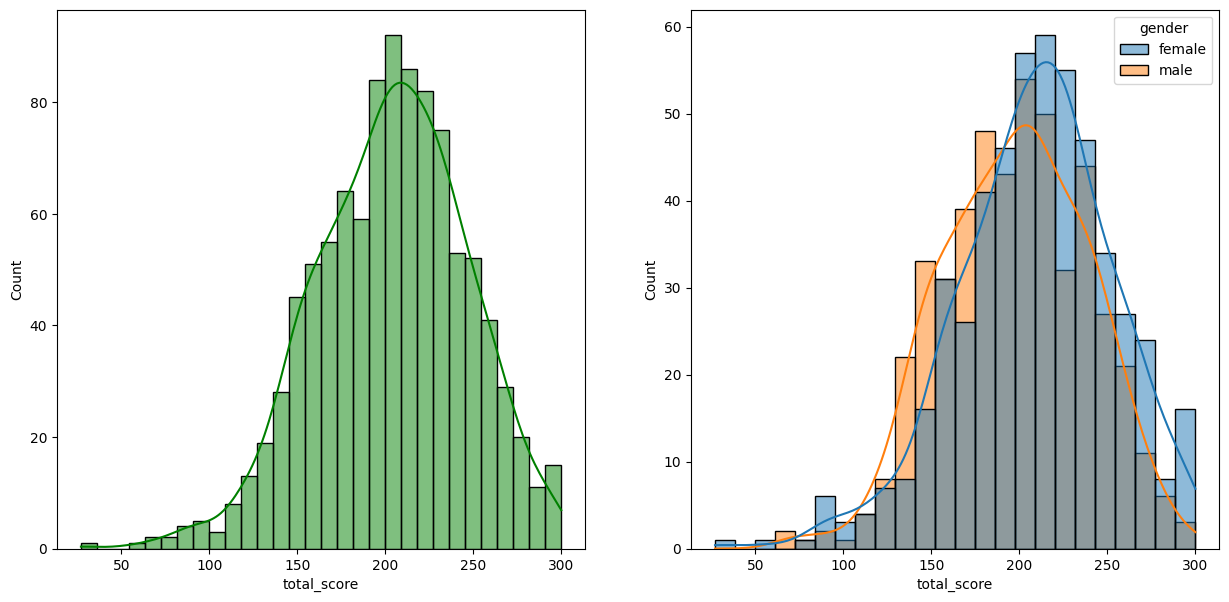

In [18]:
fig, axs = plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue = 'gender')
plt.show()
             

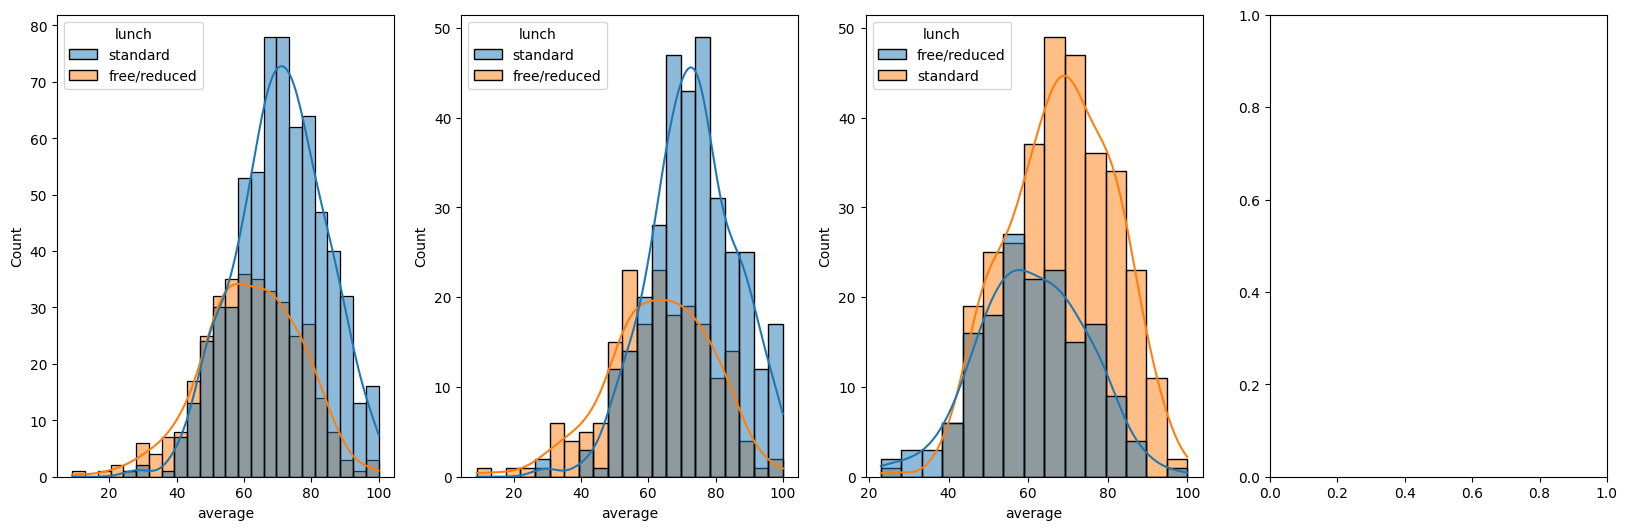

In [23]:
plt.subplots(1,4,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True, hue ='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch')
plt.show()

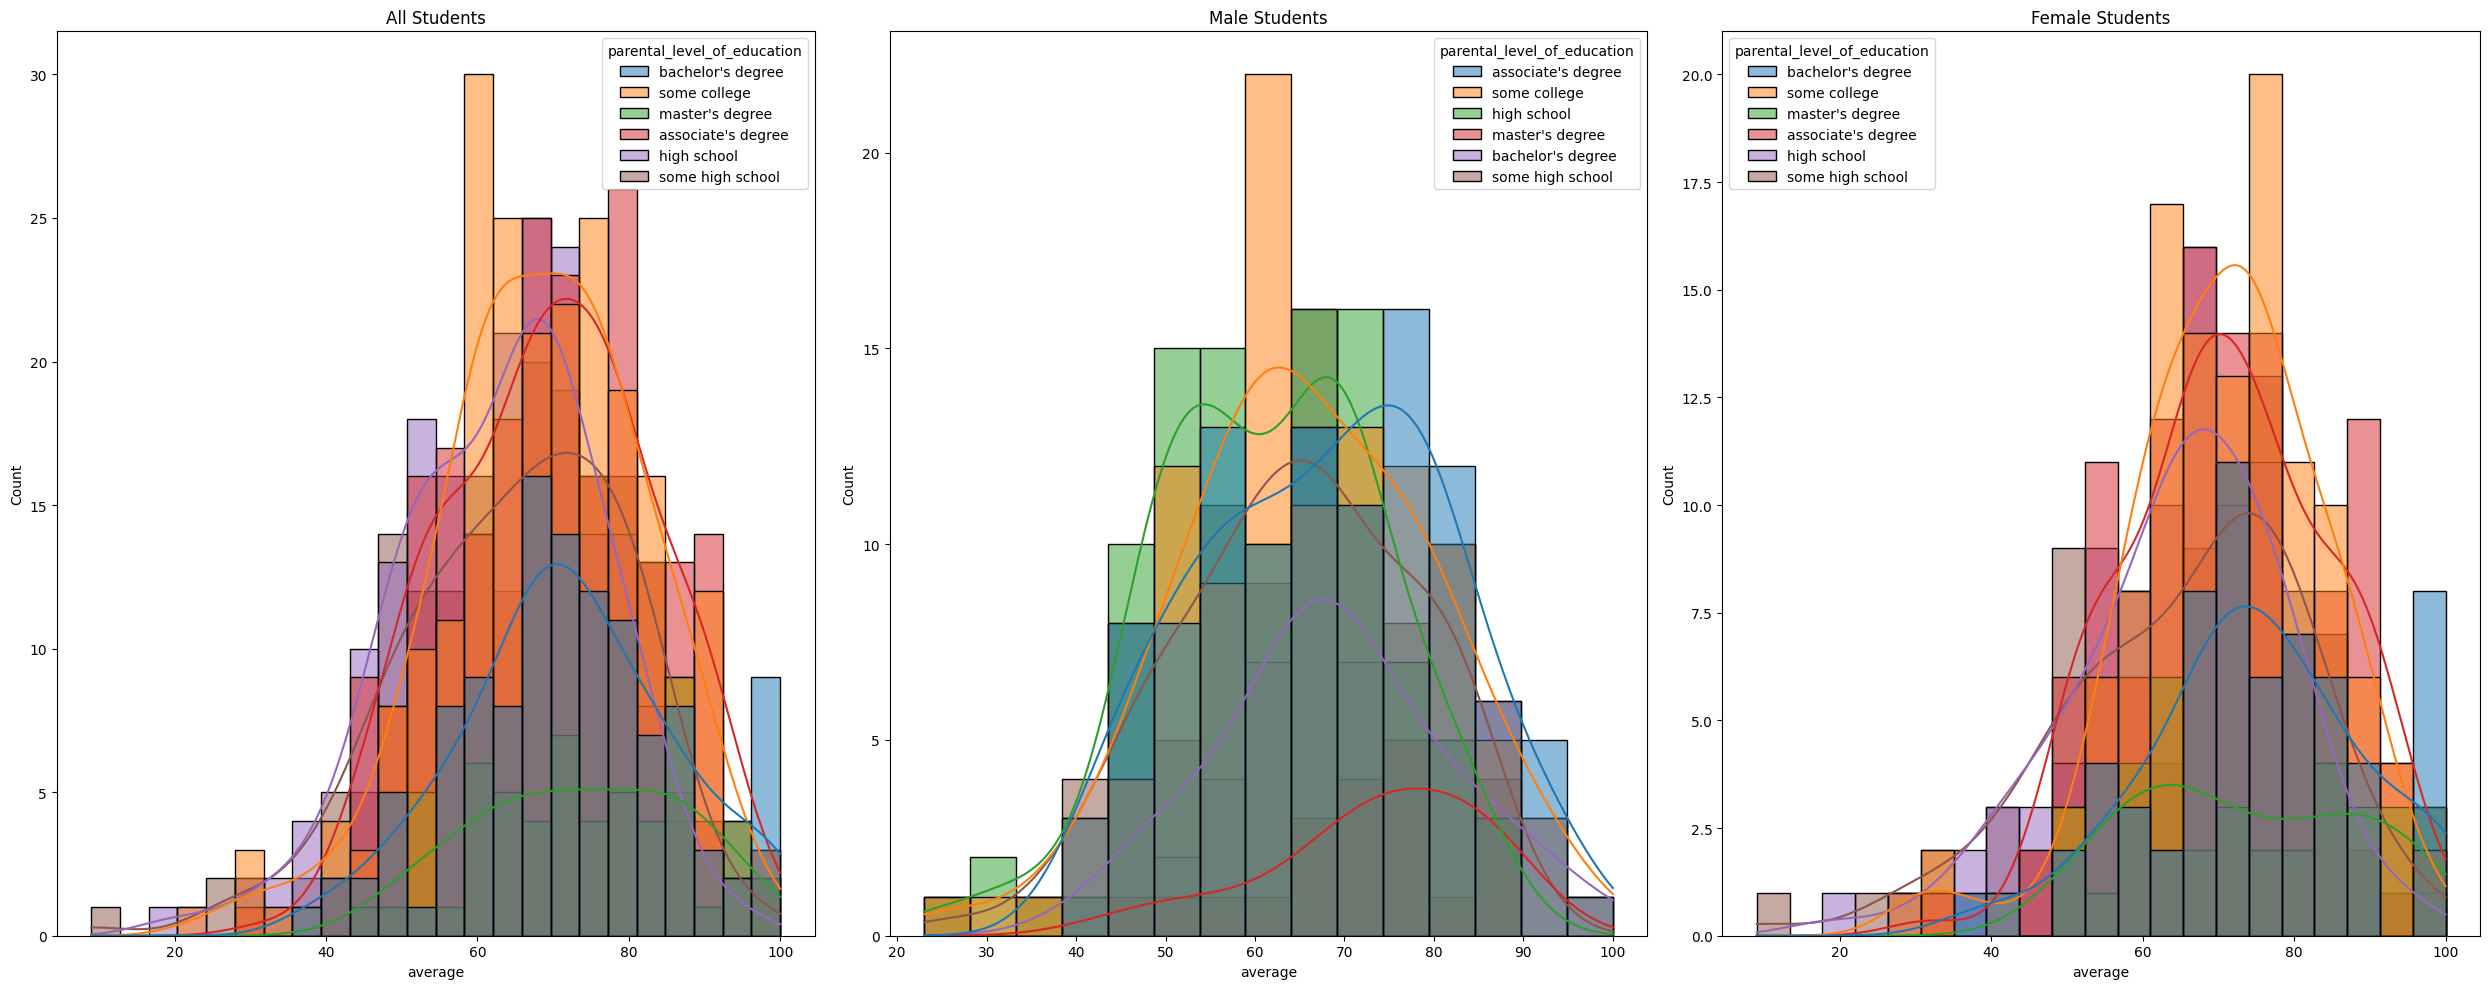

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('All Students')

sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Male Students')

sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Female Students')

plt.tight_layout()
plt.show()



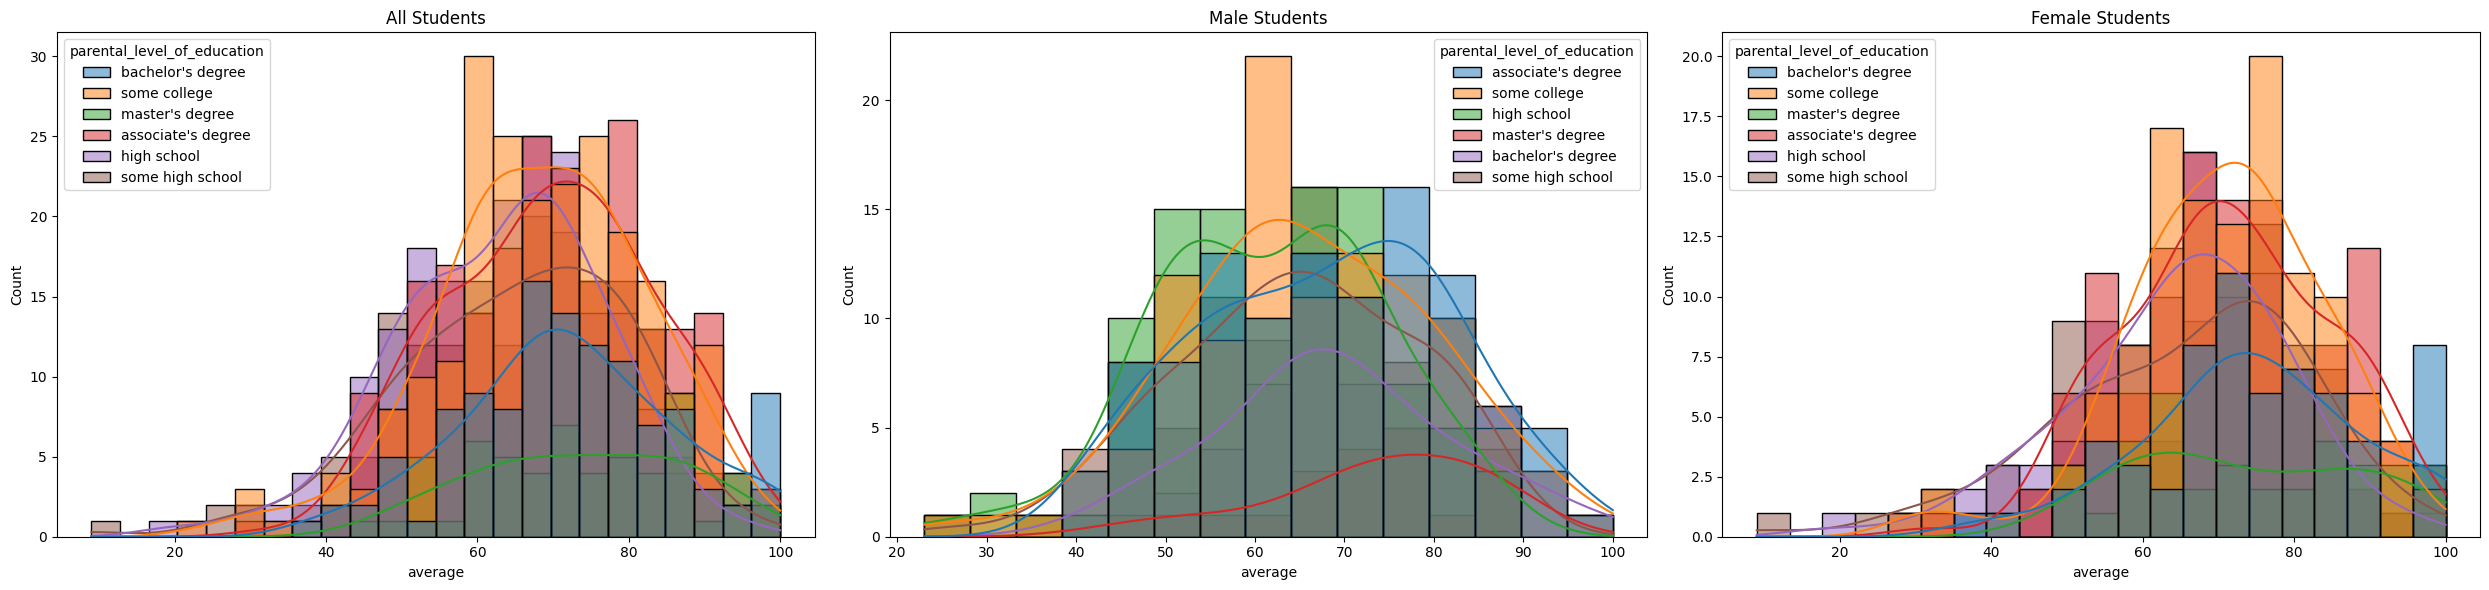

In [27]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Male Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Female Students')

plt.tight_layout()
plt.show()

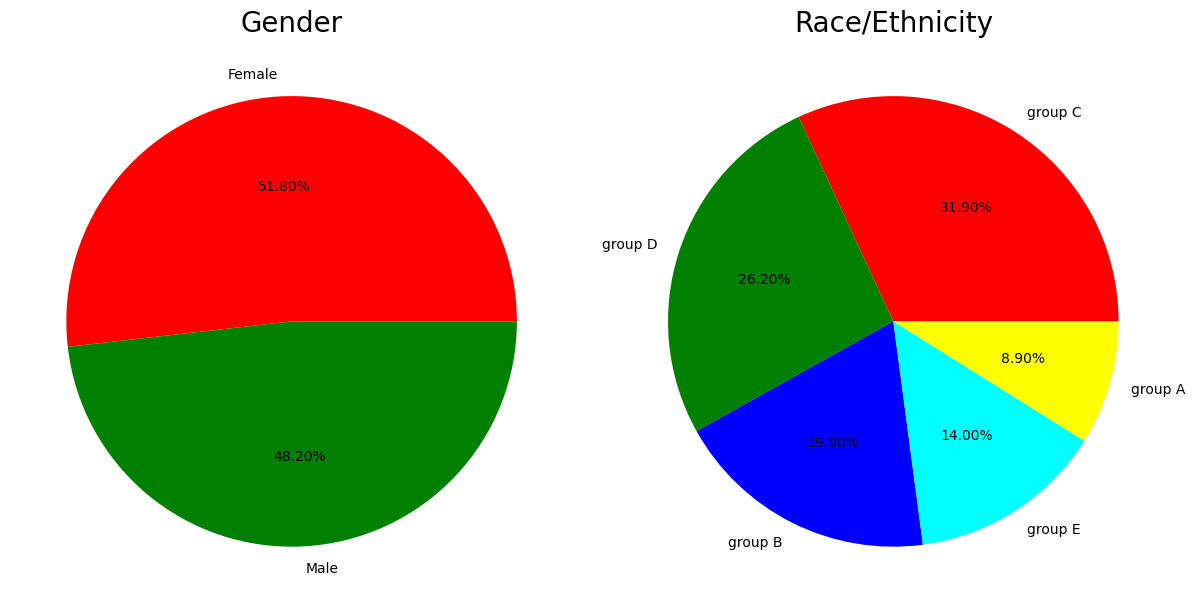

In [31]:
plt.rcParams['figure.figsize'] = (30, 12)

# Pie Chart 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Pie Chart 2: Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index  # Use actual group names from the data (e.g., Group A, B, etc.)
colors = ['red', 'green', 'blue', 'cyan', 'yellow']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

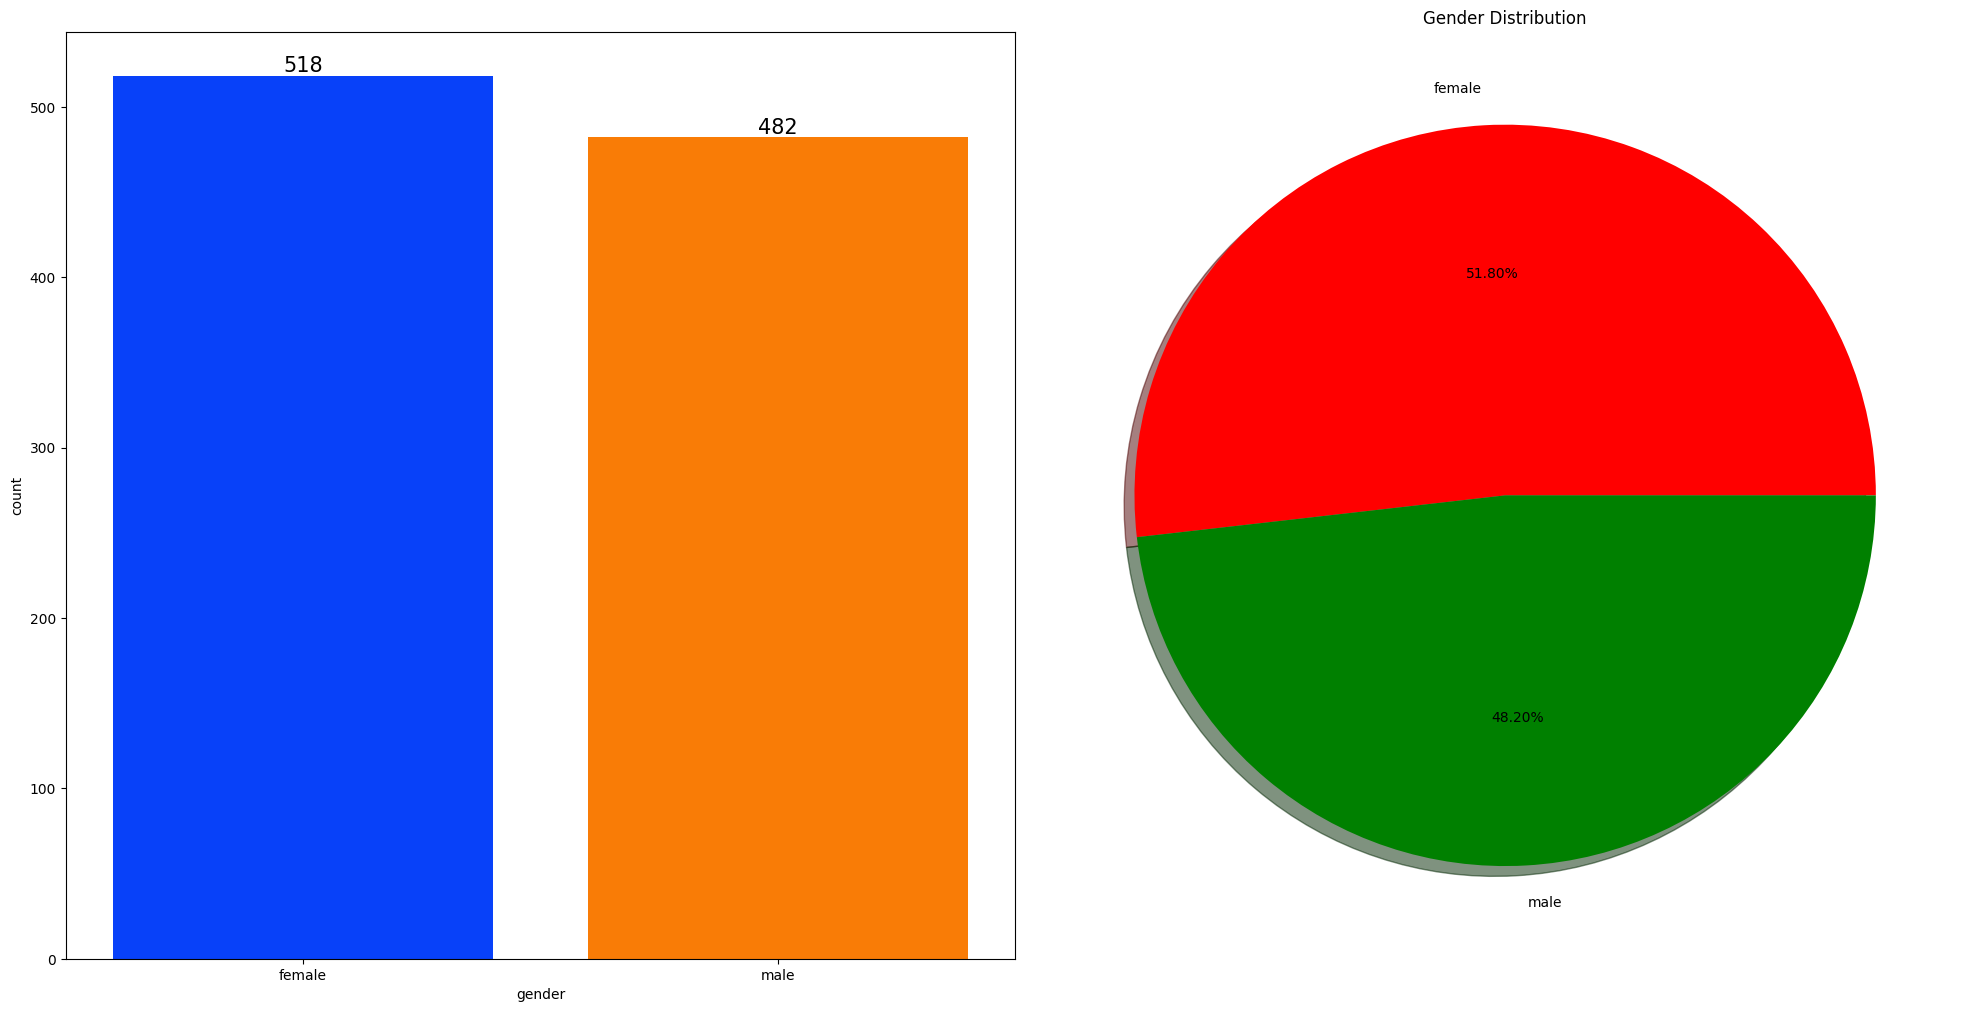

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=15, color='black')

# Pie chart
gender_counts = df['gender'].value_counts()
labels = gender_counts.index  # Automatically matches order
explode = [0.1 if label == 'Female' else 0 for label in labels]  # Explode female slice
ax[1].pie(gender_counts, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, colors=['red', 'green'])
ax[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()


In [36]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)


        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


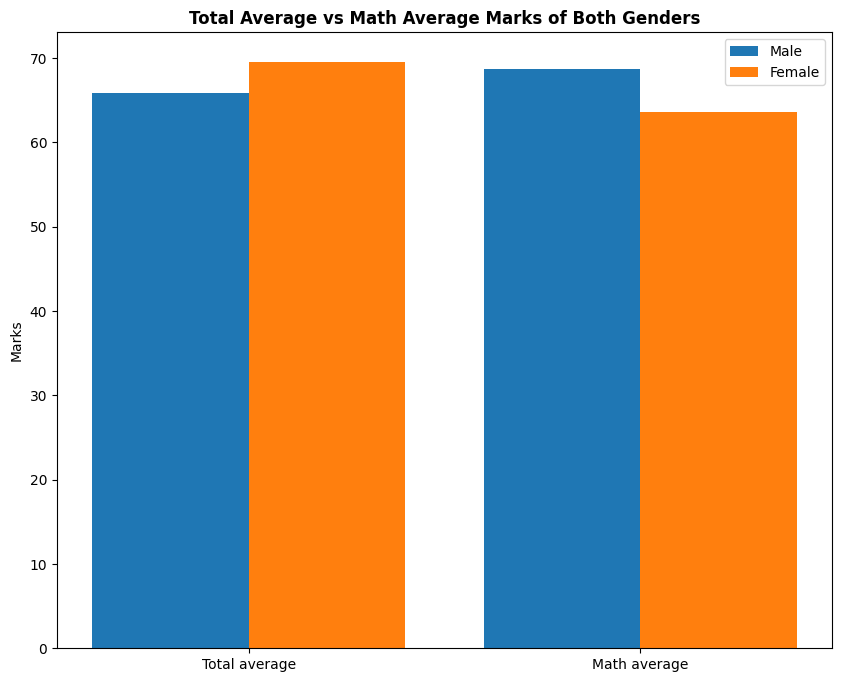

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

x = ['Total average', 'Math average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title('Total Average vs Math Average Marks of Both Genders', fontweight='bold')
plt.legend()
plt.show()
